In [ ]:
!pip install japanize_matplotlib

In [ ]:
!pip install dataframe_image 

In [66]:
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import numpy as np
import pandas as pd
from fastprogress import progress_bar as pb
sns.set(font='IPAexGothic')

In [98]:
SUCCESS_RATE_12_13 = 0.2  # 12->13へのジュエル無し成功率
SUCCESS_RATE_13_14 = 0.15  # 13->14へのジュエル無し成功率(間違ってるかも)
SUCCESS_RATE_14_15 = 0.1  # 14->15へのジュエル無し成功率(間違ってるかも)

TAIYOU_KAKERA_12_13 = 9  # 12->13へ必要な太陽のかけらの数
TAIYOU_KAKERA_13_14 = 12  # 13->14へ必要な太陽のかけらの数(間違ってるかも)
TAIYOU_KAKERA_14_15 = 15  # 14->15へ必要な太陽のかけらの数(間違ってるかも)

LUCK_JEWEL_SEHLL = 350  # ラックジュエル1個当たり無償シェル
LUCK_JEWEL_UP_RATE = 0.15  # ラックジュエル1個当たりの成功率上昇値
TAIYOU_SHELL = 80  # 太陽のかけら1個当たりの無償シェル

In [86]:
SUCCESS_RATES = [SUCCESS_RATE_12_13, SUCCESS_RATE_13_14, SUCCESS_RATE_14_15]
TAIYOU_KAKERAS = [TAIYOU_KAKERA_12_13, TAIYOU_KAKERA_13_14, TAIYOU_KAKERA_14_15]

In [87]:
N_SIMULATIONS = 50000  # 12->15成功するまでのシミュレーションの試行数
n_luck_jewel_12_13_history = []
n_luck_jewel_13_14_history = []
n_luck_jewel_14_15_history = []
taiyou_kakera_used_history = []
luck_jewel_used_history = []

for n_luck_jewel_12_13, n_luck_jewel_13_14, n_luck_jewel_14_15 in pb(itertools.product(range(4), range(4), range(4)), total=4**3):
    # n_luck_jewel_[A]_[B] : A->Bで使用するラックジュエル数
    n_luck_jewels = [n_luck_jewel_12_13, n_luck_jewel_13_14, n_luck_jewel_14_15]
    for n in range(N_SIMULATIONS):
        n_luck_jewel_12_13_history.append(n_luck_jewel_12_13)
        n_luck_jewel_13_14_history.append(n_luck_jewel_13_14)
        n_luck_jewel_14_15_history.append(n_luck_jewel_14_15)
        curr_level = 12
        taiyou_kakera_used = 0
        luck_jewel_used = 0
        while True:
            luck_jewel_used += n_luck_jewels[curr_level-12]
            taiyou_kakera_used += TAIYOU_KAKERAS[curr_level-12]
            if np.random.rand() <= SUCCESS_RATES[curr_level-12]+n_luck_jewels[curr_level-12]*LUCK_JEWEL_UP_RATE:  # 成功
                curr_level += 1
            if curr_level == 15:
                taiyou_kakera_used_history.append(taiyou_kakera_used)
                luck_jewel_used_history.append(luck_jewel_used)
                break

In [88]:
df_summary = pd.DataFrame({
    '12から13で使うラックジュエル数': n_luck_jewel_12_13_history,
    '13から14で使うラックジュエル数': n_luck_jewel_13_14_history,
    '14から15で使うラックジュエル数': n_luck_jewel_14_15_history,
    '15になるまでに使用した太陽のかけら数平均': taiyou_kakera_used_history,
    '15になるまでに使用したラックジュエル数平均': luck_jewel_used_history,
})

In [105]:
pd.set_option('display.max_rows', 500)
pd.options.display.precision = 0

In [106]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### 各レベル強化時のラックジュエル使用個数全組み合わせパターンでの平均太陽のかけらとラックジュエル必要個数

In [99]:
df_mean = df_summary.groupby(['12から13で使うラックジュエル数', '13から14で使うラックジュエル数', '14から15で使うラックジュエル数']).mean()

In [101]:
df_mean['無償シェル換算'] = df_mean['15になるまでに使用したラックジュエル数平均']*LUCK_JEWEL_SEHLL + df_mean['15になるまでに使用した太陽のかけら数平均']*TAIYOU_SHELL

In [107]:
df_mean

15になるまでに使用した太陽のかけら数平均  \
12から13で使うラックジュエル数 13から14で使うラックジュエル数 14から15で使うラックジュエル数                          
0                 0                 0                                    277   
                                    1                                    185   
                                    2                                    163   
                                    3                                    152   
                  1                 0                                    234   
                                    1                                    145   
                                    2                                    123   
                                    3                                    112   
                  2                 0                                    221   
                                    1                                    132   
                                    2                                    109   
                                    3                                     99   
                  3                 0                                    215   
                                    1                                    124   
                                    2                                    103   
                                    3                                     92   
1                 0                 0                                    256   
                                    1                                    165   
                                    2                                    144   
                                    3                                    133   
                  1                 0                                    216   
                                    1                                    126   
                                    2                                    103   
                                    3                                     93   
                  2                 0                                    202   
                                    1                                    113   
                                    2                                     90   
                                    3                                     80   
                  3                 0                                    195   
                                    1                                    106   
                                    2                                     83   
                                    3                                     73   
2                 0                 0                                    248   
                                    1                                    158   
                                    2                                    135   
                                    3                                    126   
                  1                 0                                    208   
                                    1                                    118   
                                    2                                     95   
                                    3                                     85   
                  2                 0                                    195   
                                    1                                    105   
                                    2                                     82   
                                    3                                     72   
                  3                 0                                    188   
                                    1                                     98   
                                    2                                     75   
                                    3                                     65   
3                 0                 0                  

### 無償シェル換算で並び替え

In [103]:
df_mean.sort_values(by='無償シェル換算')

,,,15になるまでに使用した太陽のかけら数平均,15になるまでに使用したラックジュエル数平均,無償シェル換算
12から13で使うラックジュエル数,13から14で使うラックジュエル数,14から15で使うラックジュエル数,,,
3,3,3,61,15,10175
2,3,3,65,14,10298
1,3,3,73,13,10468
3,2,3,68,15,10514
2,2,3,72,14,10620
3,3,2,71,15,10803
1,2,3,80,13,10863
2,3,2,75,14,10924
0,3,3,92,10,11060


In [ ]:
fig, ax = plt.subplots(figsize=(28, 40))
ax.axis('off')
ax.axis('tight')
table = ax.table(
    rowLabels=df_mean.sort_values(by='無償シェル換算').reset_index().index,
    cellText=df_mean.sort_values(by='無償シェル換算').reset_index().values.astype(int),
    colLabels=df_mean.sort_values(by='無償シェル換算').reset_index().columns,
    loc='center',
    bbox=[0,0,1,1]
)
table.auto_set_font_size(False)
table.set_fontsize(12)
plt.savefig('./luck_jewel.png')

ラックジュエルを使用しない場合、12->15強化で平均277個、10%の運のいい人は105個以下、10%の運の悪い人は498個以上太陽のかけらが必要


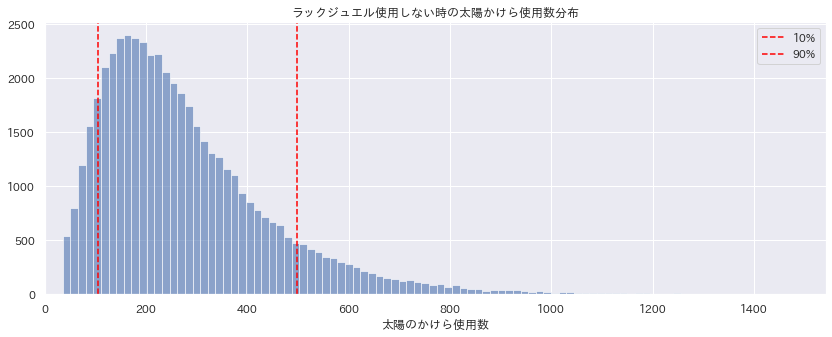

In [91]:
n_luck_jewel_12_13 = 0
n_luck_jewel_13_14 = 0
n_luck_jewel_14_15 = 0

p10 = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].quantile(0.1)
p90 = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].quantile(0.9)
mean = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].mean()
max = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].max()
_ = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].hist(bins=100, alpha=0.6, figsize=(14, 5))
plt.axvline(p10, linestyle='dashed', color='red', label='10%')
plt.axvline(p90, linestyle='dashed', color='red', label='90%')
plt.legend()
plt.title('ラックジュエル使用しない時の太陽かけら使用数分布')
plt.xlim(0, max)
plt.xlabel('太陽のかけら使用数')
plt.plot()
print(f'ラックジュエルを使用しない場合、12->15強化で平均{int(mean)}個、10%の運のいい人は{int(p10)}個以下、10%の運の悪い人は{int(p90)}個以上太陽のかけらが必要')

12->15強化で毎回ラックジュエルを3個使う場合、平均61個、10%の運のいい人は36個以下、10%の運の悪い人は93個以上太陽のかけらが必要


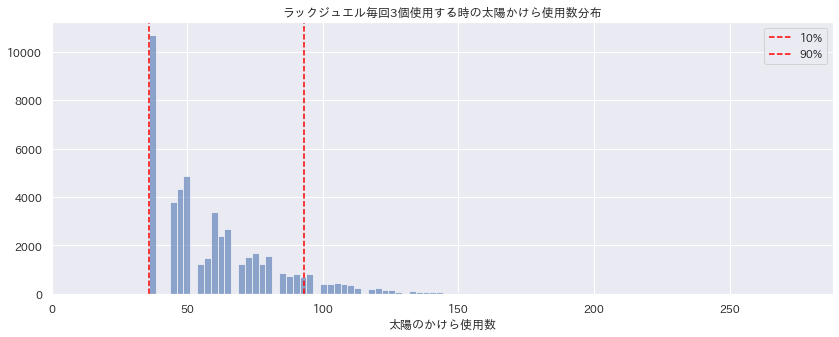

In [92]:
n_luck_jewel_12_13 = 3
n_luck_jewel_13_14 = 3
n_luck_jewel_14_15 = 3

p10 = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].quantile(0.1)
p90 = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].quantile(0.9)
mean = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].mean()
max = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].max()
_ = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].hist(bins=100, alpha=0.6, figsize=(14, 5))
plt.axvline(p10, linestyle='dashed', color='red', label='10%')
plt.axvline(p90, linestyle='dashed', color='red', label='90%')
plt.legend()
plt.title('ラックジュエル毎回3個使用する時の太陽かけら使用数分布')
plt.xlim(0, max)
plt.xlabel('太陽のかけら使用数')
plt.plot()

print(f'12->15強化で毎回ラックジュエルを3個使う場合、平均{int(mean)}個、10%の運のいい人は{int(p10)}個以下、10%の運の悪い人は{int(p90)}個以上太陽のかけらが必要')


12->15強化で毎回ラックジュエルを3個使う場合、平均15個、10%の運のいい人は9個以下、10%の運の悪い人は24個以上ラックジュエルが必要


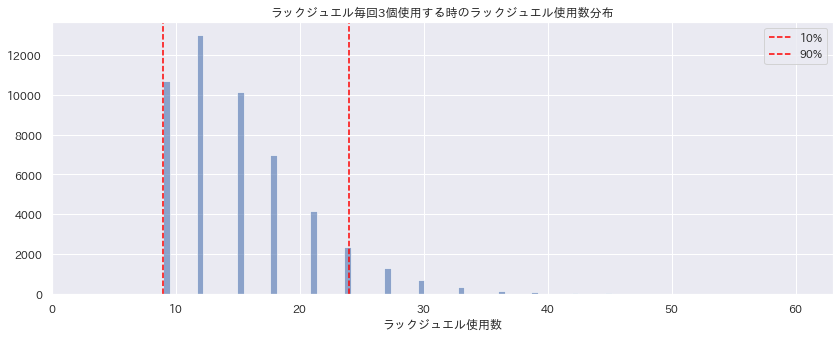

In [93]:
n_luck_jewel_12_13 = 3
n_luck_jewel_13_14 = 3
n_luck_jewel_14_15 = 3

p10 = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用したラックジュエル数平均'].quantile(0.1)
p90 = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用したラックジュエル数平均'].quantile(0.9)
mean = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用したラックジュエル数平均'].mean()
max = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用したラックジュエル数平均'].max()
_ = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用したラックジュエル数平均'].hist(bins=100, alpha=0.6, figsize=(14, 5))
plt.axvline(p10, linestyle='dashed', color='red', label='10%')
plt.axvline(p90, linestyle='dashed', color='red', label='90%')
plt.legend()
plt.title('ラックジュエル毎回3個使用する時のラックジュエル使用数分布')
plt.xlim(0, max)
plt.xlabel('ラックジュエル使用数')
plt.plot()

print(f'12->15強化で毎回ラックジュエルを3個使う場合、平均{int(mean)}個、10%の運のいい人は{int(p10)}個以下、10%の運の悪い人は{int(p90)}個以上ラックジュエルが必要')


12->14強化で2個、14->15で3個ラックジュエルを使う場合、平均71個、10%の運のいい人は36個以下、10%の運の悪い人は111個以上太陽のかけらが必要


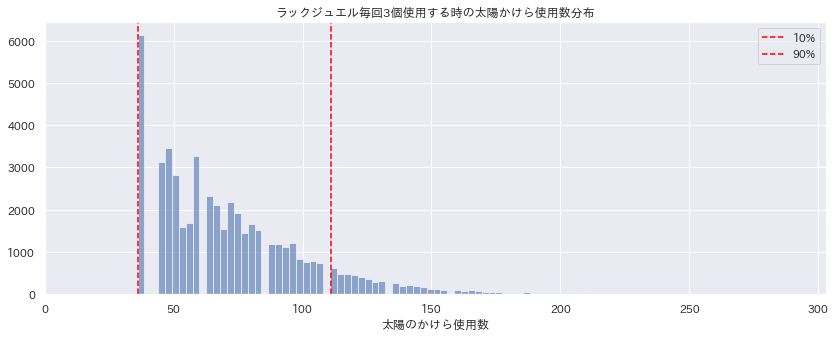

In [97]:
n_luck_jewel_12_13 = 2
n_luck_jewel_13_14 = 2
n_luck_jewel_14_15 = 3

p10 = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].quantile(0.1)
p90 = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].quantile(0.9)
mean = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].mean()
max = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].max()
_ = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用した太陽のかけら数平均'].hist(bins=100, alpha=0.6, figsize=(14, 5))
plt.axvline(p10, linestyle='dashed', color='red', label='10%')
plt.axvline(p90, linestyle='dashed', color='red', label='90%')
plt.legend()
plt.title('ラックジュエル毎回3個使用する時の太陽かけら使用数分布')
plt.xlim(0, max)
plt.xlabel('太陽のかけら使用数')
plt.plot()

print(f'12->14強化で2個、14->15で3個ラックジュエルを使う場合、平均{int(mean)}個、10%の運のいい人は{int(p10)}個以下、10%の運の悪い人は{int(p90)}個以上太陽のかけらが必要')


12->14強化で2個、14->15で3個ラックジュエルを使う場合、平均10個、10%の運のいい人は6個以下、10%の運の悪い人は18個以上ラックジュエルが必要


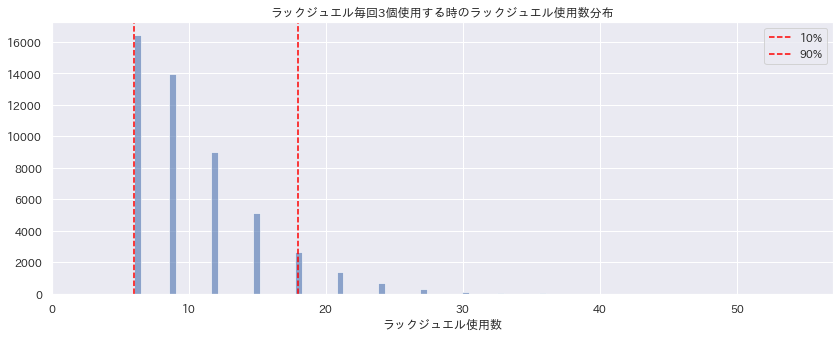

In [96]:
n_luck_jewel_12_13 = 0
n_luck_jewel_13_14 = 3
n_luck_jewel_14_15 = 3

p10 = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用したラックジュエル数平均'].quantile(0.1)
p90 = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用したラックジュエル数平均'].quantile(0.9)
mean = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用したラックジュエル数平均'].mean()
max = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用したラックジュエル数平均'].max()
_ = df_summary[
    (df_summary['12から13で使うラックジュエル数']==n_luck_jewel_12_13) & (df_summary['13から14で使うラックジュエル数']==n_luck_jewel_13_14) & (df_summary['14から15で使うラックジュエル数']==n_luck_jewel_14_15)
]['15になるまでに使用したラックジュエル数平均'].hist(bins=100, alpha=0.6, figsize=(14, 5))
plt.axvline(p10, linestyle='dashed', color='red', label='10%')
plt.axvline(p90, linestyle='dashed', color='red', label='90%')
plt.legend()
plt.title('ラックジュエル毎回3個使用する時のラックジュエル使用数分布')
plt.xlim(0, max)
plt.xlabel('ラックジュエル使用数')
plt.plot()

print(f'12->14強化で2個、14->15で3個ラックジュエルを使う場合、平均{int(mean)}個、10%の運のいい人は{int(p10)}個以下、10%の運の悪い人は{int(p90)}個以上ラックジュエルが必要')


In [45]:
df_summary.groupby(['12から13で使うラックジュエル数', '13から14で使うラックジュエル数', '14から15で使うラックジュエル数']).mean().sort_values(by='15になるまでに使用した太陽のかけら数平均')

15になるまでに使用した太陽のかけら数平均  \
12から13で使うラックジュエル数 13から14で使うラックジュエル数 14から15で使うラックジュエル数                          
3                 3                 3                                     51   
2                 3                 3                                     55   
3                 2                 3                                     56   
                  3                 2                                     58   
2                 2                 3                                     60   
                  3                 2                                     62   
1                 3                 3                                     62   
3                 2                 2                                     64   
                  1                 3                                     67   
2                 2                 2                                     68   
1                 2                 3                                     68   
                  3                 2                                     70   
2                 1                 3                                     71   
3                 1                 2                                     75   
                  3                 1                                     75   
1                 2                 2                                     76   
2                 3                 1                                     78   
                  1                 2                                     79   
1                 1                 3                                     79   
3                 2                 1                                     80   
0                 3                 3                                     82   
2                 2                 1                                     84   
1                 1                 2                                     87   
                  3                 1                                     87   
0                 2                 3                                     87   
                  3                 2                                     89   
3                 1                 1                                     91   
1                 2                 1                                     92   
0                 2                 2                                     95   
2                 1                 1                                     95   
0                 1                 3                                     98   
3                 0                 3                                    100   
1                 1                 1                                    104   
2                 0                 3                                    105   
0                 1                 2                                    106   
                  3                 1                                    106   
3                 0                 2                                    108   
0                 2                 1                                    112   
1                 0                 3                                    112   
2                 0                 2                                    112   
1                 0                 2                                    119   
0                 1                 1                                    122   
3                 0                 1                                    125   
2                 0                 1                                    128   
0                 0                 3                                    132   
1                 0                 1                                    136   
0                 0                 2                                    139   
3                 3                 0                                    140   
2                 3                 0                  

In [46]:
df_summary.groupby(['12から13で使うラックジュエル数', '13から14で使うラックジュエル数', '14から15で使うラックジュエル数']).mean().sort_values(by='15になるまでに使用したラックジュエル数平均')

15になるまでに使用した太陽のかけら数平均  \
12から13で使うラックジュエル数 13から14で使うラックジュエル数 14から15で使うラックジュエル数                          
0                 0                 0                                    222   
1                 0                 0                                    203   
0                 1                 0                                    188   
                  0                 1                                    155   
2                 0                 0                                    195   
0                 2                 0                                    177   
3                 0                 0                                    190   
0                 3                 0                                    172   
                  0                 2                                    139   
                                    3                                    132   
1                 1                 0                                    170   
                  0                 1                                    136   
                  2                 0                                    159   
0                 1                 1                                    122   
2                 1                 0                                    161   
1                 0                 2                                    119   
                  3                 0                                    152   
3                 1                 0                                    157   
2                 0                 1                                    128   
1                 0                 3                                    112   
0                 1                 2                                    106   
2                 2                 0                                    150   
0                 2                 1                                    112   
3                 0                 1                                    125   
0                 1                 3                                     98   
2                 3                 0                                    145   
                  0                 2                                    112   
0                 3                 1                                    106   
3                 2                 0                                    146   
0                 2                 2                                     95   
2                 0                 3                                    105   
3                 3                 0                                    140   
                  0                 2                                    108   
0                 2                 3                                     87   
                  3                 2                                     89   
3                 0                 3                                    100   
1                 1                 1                                    104   
0                 3                 3                                     82   
1                 1                 2                                     87   
                  2                 1                                     92   
2                 1                 1                                     95   
1                 1                 3                                     79   
                  3                 1                                     87   
3                 1                 1                                     91   
2                 1                 2                                     79   
1                 2                 2                                     76   
2                 2                 1                                     84   
1                 2                 3                                     68   
2                 1                 3                  